In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv('weather.csv', sep = ';')

# Columns
1. maximum air temperature (°C)
2. minimum air temperature (°C)
3. mean air temperature (°C)
4. mean daily wind speed at 10m (m/s)
5. vapour pressure (hPa)
6. sum of precipitation (mm/day)
7. potential evaporation from a free water surface (mm/day)
8. potential evapotranspiration from a crop canopy (mm/day)
9. potential evaporation from a moist bare soil surface (mm/day)
10. total global radiation (KJ/m2/day)
11. Snow Depth

In [5]:
data.head(100)

,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,DAY,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,VAPOURPRESSURE,PRECIPITATION,E0,ES0,ET0,RADIATION,SNOWDEPTH
0,28193,31.53312,31.90678,5,20040101,18.5,12.1,15.3,5.2,12.48,0.7,2.17,1.87,2.27,11441,NaN
1,28193,31.53312,31.90678,5,20040102,18.4,12.0,15.2,5.2,12.44,0.7,2.15,1.86,2.26,11349,NaN
2,28193,31.53312,31.90678,5,20040103,18.4,12.0,15.2,5.2,12.37,0.7,2.16,1.87,2.27,11293,NaN
3,28193,31.53312,31.90678,5,20040104,18.3,11.8,15.1,5.2,12.33,0.8,2.15,1.86,2.26,11333,NaN
4,28193,31.53312,31.90678,5,20040105,18.2,11.7,14.9,5.2,12.28,0.8,2.14,1.85,2.24,11303,NaN
5,28193,31.53312,31.90678,5,20040106,18.1,11.6,14.9,5.2,12.24,0.8,2.15,1.87,2.25,11388,NaN
6,28193,31.53312,31.90678,5,20040107,18.0,11.6,14.8,5.2,12.17,0.8,2.17,1.88,2.27,11446,NaN
7,28193,31.53312,31.90678,5,20040108,17.9,11.6,14.7,5.1,12.09,0.8,2.18,1.89,2.27,11514,NaN
8,28193,31.53312,31.90678,5,20040109,17.9,11.5,14.7,5.1,12.07,0.9,2.19,1.89,2.27,11588,NaN
9,28193,31.53312,31.90678,5,20040110,17.8,11.5,14.7,5.1,12.08,0.9,2.17,1.88,2.25,11630,NaN


# Dropping grid_no , snowdepth and time column for fitting to model

In [20]:
df = data.drop(["GRID_NO","SNOWDEPTH","DAY"], axis = 1)

In [21]:
df

,LATITUDE,LONGITUDE,ALTITUDE,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,VAPOURPRESSURE,PRECIPITATION,E0,ES0,ET0,RADIATION
0,31.53312,31.90678,5,18.5,12.1,15.3,5.2,12.48,0.7,2.17,1.87,2.27,11441
1,31.53312,31.90678,5,18.4,12.0,15.2,5.2,12.44,0.7,2.15,1.86,2.26,11349
2,31.53312,31.90678,5,18.4,12.0,15.2,5.2,12.37,0.7,2.16,1.87,2.27,11293
3,31.53312,31.90678,5,18.3,11.8,15.1,5.2,12.33,0.8,2.15,1.86,2.26,11333
4,31.53312,31.90678,5,18.2,11.7,14.9,5.2,12.28,0.8,2.14,1.85,2.24,11303
5,31.53312,31.90678,5,18.1,11.6,14.9,5.2,12.24,0.8,2.15,1.87,2.25,11388
6,31.53312,31.90678,5,18.0,11.6,14.8,5.2,12.17,0.8,2.17,1.88,2.27,11446
7,31.53312,31.90678,5,17.9,11.6,14.7,5.1,12.09,0.8,2.18,1.89,2.27,11514
8,31.53312,31.90678,5,17.9,11.5,14.7,5.1,12.07,0.9,2.19,1.89,2.27,11588
9,31.53312,31.90678,5,17.8,11.5,14.7,5.1,12.08,0.9,2.17,1.88,2.25,11630


# Trying to predict Evapotranspiration from the other parameters

## X contains all data except Evapotranspiration column
## Y contains only the Evapotranspiration column

In [27]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12]].values

In [29]:
y = df.iloc[:,10].values

## Making the regression model using Random Forest Regressor 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


## Plotting the difference between predicted values and the True values 

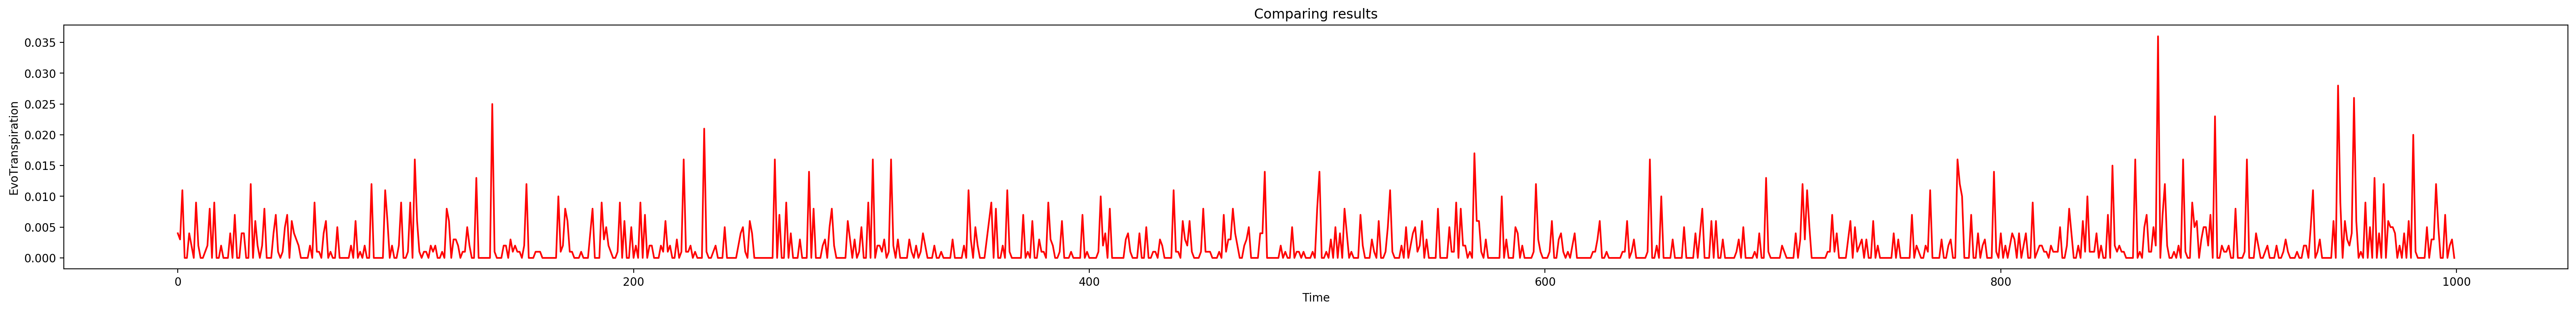

In [51]:
y_pred = regressor.predict(X_test)
plt.figure(num=None, figsize=(40, 4), dpi=200, facecolor='w', edgecolor='k')
plt.plot(list(range(1000)), abs(y_test[:1000]-y_pred[:1000]), color = 'red')
plt.title('Comparing results')
plt.xlabel('Time')
plt.ylabel('EvoTranspiration')
plt.show()

We can see the error is peak in two points and maximum error is 0.035 units which is less and the mean of the error is around 0.015 which is very less

In [61]:
from sklearn.metrics import r2_score as sc

In [62]:
sc(y_test,y_pred)

0.9999956221104092

# R2 Score is the metric used to score regression . Score is 0.9999956221104092 , which compared more than 1 million predicted values and 1 million true values